In [2]:
!pip install xgboost

# 1-Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2-Exploratory Data Analysis

In [4]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning Project/Loan Approval/LoanApprovalPrediction.csv')

In [5]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0.0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID isn't necessary so we can drop it.

In [6]:
df.drop(['Loan_ID'],axis=1,inplace=True)

In [7]:
df.isnull().sum()

,0
Gender,0
Married,0
Dependents,12
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,21
Loan_Amount_Term,14
Credit_History,49


## 2-1-Gender

In [8]:
df.Gender.value_counts(dropna=False)

,count
Gender,
Male,487
Female,111


<ipython-input-9-4a1861040e11>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Gender", data=df, palette="hls")


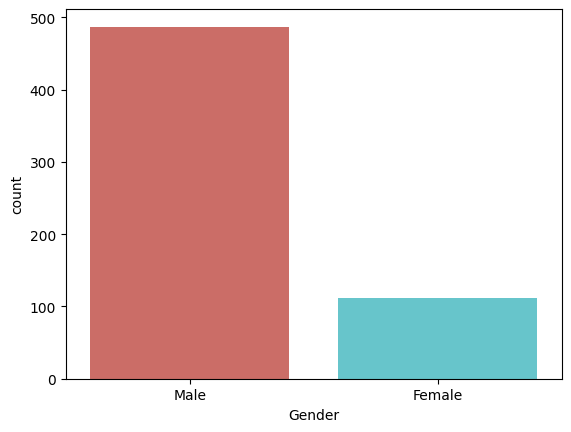

In [9]:
sns.countplot(x="Gender", data=df, palette="hls")
plt.show()

## 2-2-Married

In [10]:
df.Married.value_counts(dropna=False)

,count
Married,
Yes,388
No,210


<ipython-input-11-9622a69975d7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Married", data=df, palette="crest")


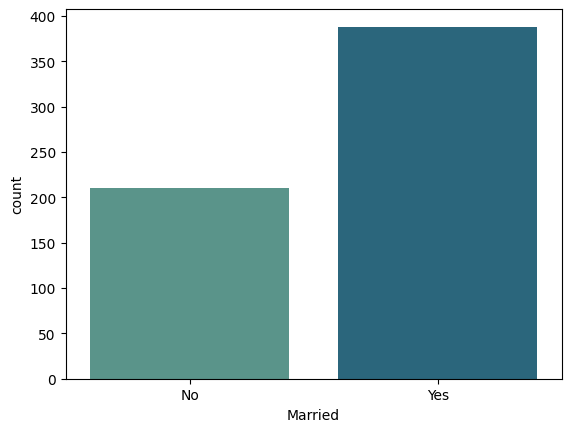

In [11]:
sns.countplot(x="Married", data=df, palette="crest")
plt.show()

## 2-3-Education

In [12]:
df.Education.value_counts(dropna=False)

,count
Education,
Graduate,465
Not Graduate,133


<ipython-input-13-8e9ea3c8e87a>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Education", data=df, palette="rocket")


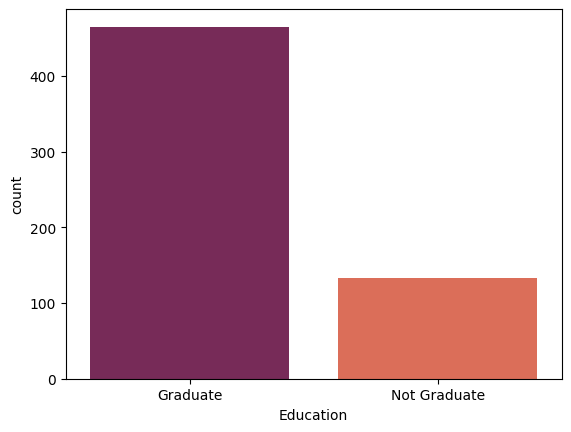

In [13]:
sns.countplot(x="Education", data=df, palette="rocket")
plt.show()

## 2-4-Self Employed

In [14]:
df.Self_Employed.value_counts(dropna=False)

,count
Self_Employed,
No,488
Yes,110


<ipython-input-15-283837bf1c2e>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Self_Employed", data=df, palette="crest")


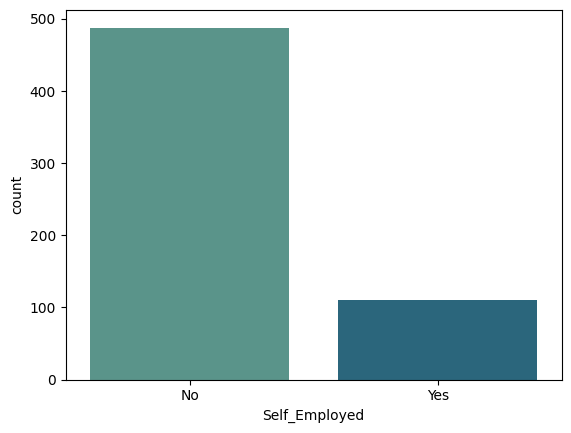

In [15]:
sns.countplot(x="Self_Employed", data=df, palette="crest")
plt.show()

## 2-5-Credit History

In [16]:
df.Credit_History.value_counts(dropna=False)

,count
Credit_History,
1.0,463
0.0,86
NaN,49


<ipython-input-17-b2abd7acd8ee>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Credit_History", data=df, palette="viridis")


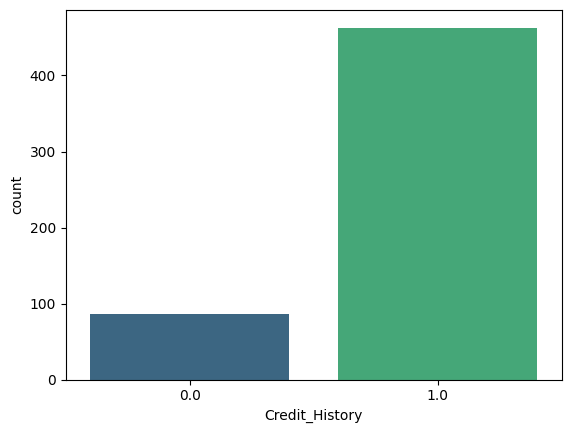

In [17]:
sns.countplot(x="Credit_History", data=df, palette="viridis")
plt.show()

## 2-6-Property Area


In [18]:
df.Property_Area.value_counts(dropna=False)

,count
Property_Area,
Semiurban,225
Urban,198
Rural,175


<ipython-input-19-3f0e29f42635>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Property_Area", data=df, palette="cubehelix")


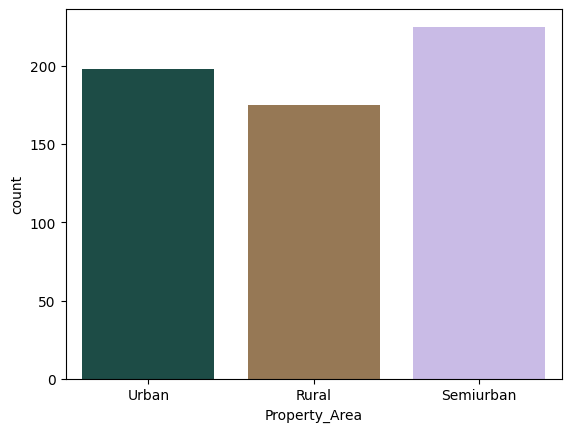

In [19]:
sns.countplot(x="Property_Area", data=df, palette="cubehelix")
plt.show()

## 2-7-Loan Status

In [20]:
df.Loan_Status.value_counts(dropna=False)

,count
Loan_Status,
Y,411
N,187


<ipython-input-21-06b98ed0a451>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")


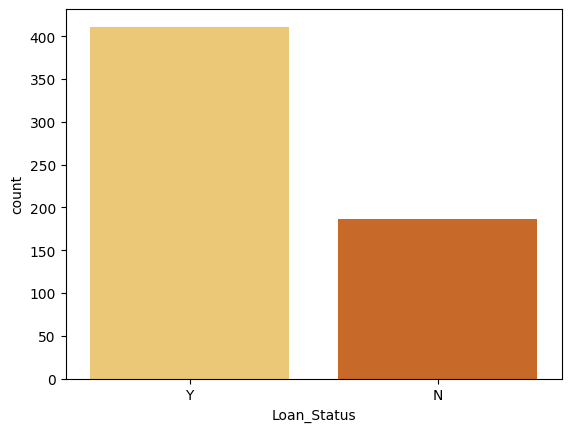

In [21]:
sns.countplot(x="Loan_Status", data=df, palette="YlOrBr")
plt.show()

# 3-Variables Distribution

## 3-1-Histogram Distribution

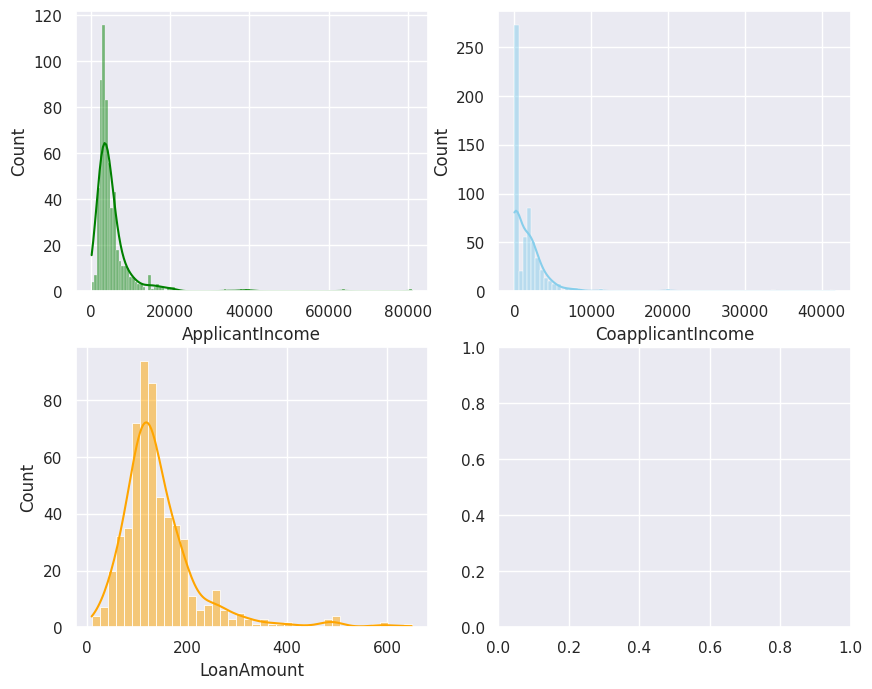

In [22]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

## 3-2-Pairplot


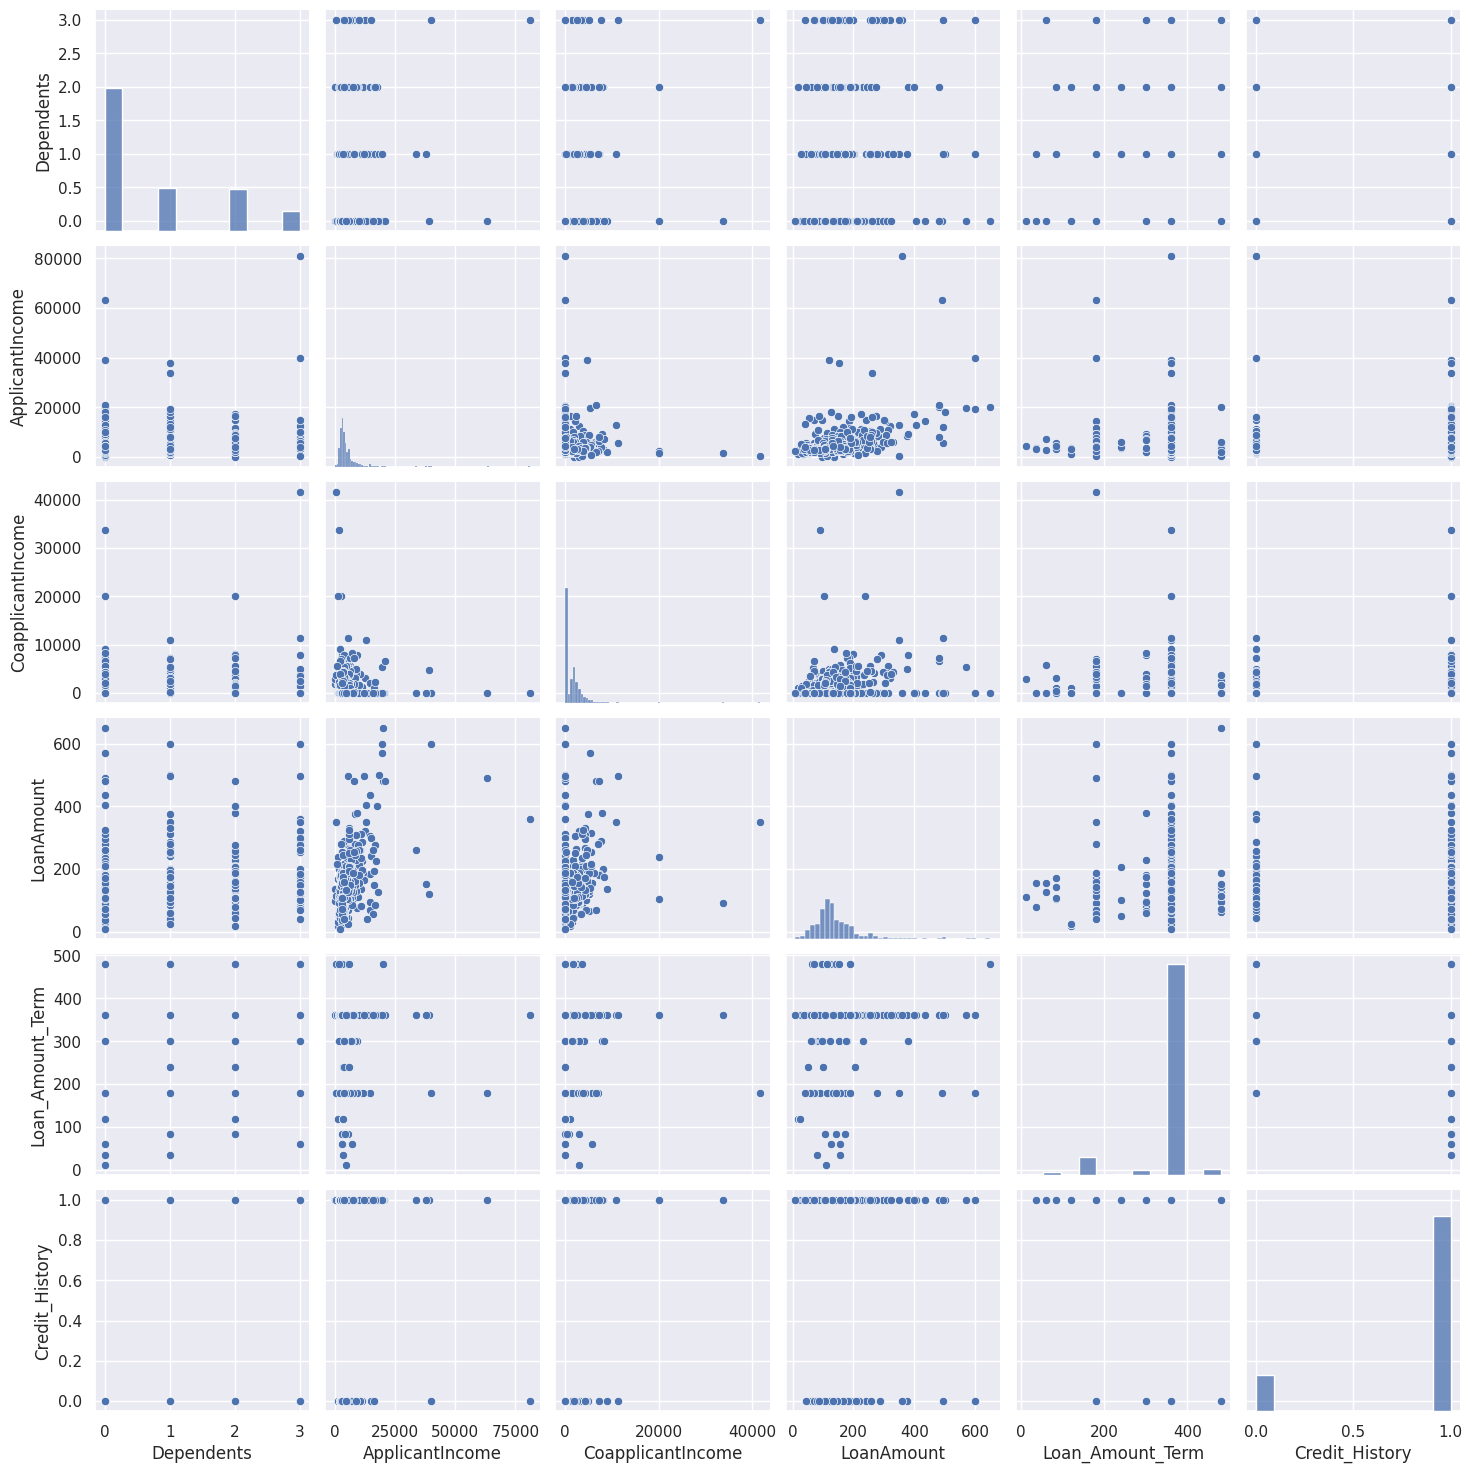

In [23]:
sns.pairplot(df)

We can see there is a positive correlation between Loan Amount and Applicant Income

# 4-Data Preprocessing

In [24]:
from sklearn import preprocessing

In [25]:
label_encoder = preprocessing.LabelEncoder()
obj = (df.dtypes == 'object')
for col in list(obj[obj].index):
  df[col] = label_encoder.fit_transform(df[col])

In [26]:
obj = (df.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 0


In [27]:

for col in df.columns:
  df[col] = df[col].fillna(df[col].mean())

df.isna().sum()

,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0
Credit_History,0


# 5-Model Training & Evaluation

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [29]:
X=df.drop(['Loan_Status'],axis=1)
y=df['Loan_Status']

In [30]:
X=MinMaxScaler().fit_transform(X)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((478, 11), (120, 11), (478,), (120,))

We are going to compare between Logistic Regression, SVC, KNN and Randomforest

## 5-1-Logistic Regression

In [33]:
modelLR = LogisticRegression(solver='saga', max_iter=500, random_state=1)
modelLR.fit(X_train, y_train)

y_pred = modelLR.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)
print('LR accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.80      0.99      0.88        85

    accuracy                           0.82       120
   macro avg       0.87      0.69      0.72       120
weighted avg       0.84      0.82      0.79       120

[[14 21]
 [ 1 84]]
LR accuracy: 81.67%


Logistic Regression has an accuracy of 81%

## 5-2-KNN

We are going to compare between k values to find the best one

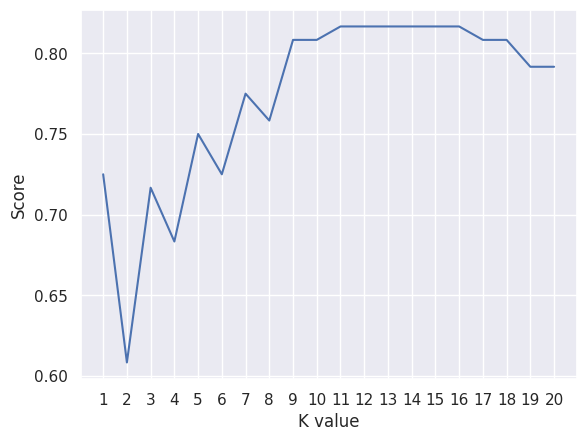

KNN best accuracy: 81.67%


In [34]:
scoreListknn = []
for i in range(1,21):
    modelKNN = KNeighborsClassifier(n_neighbors = i)
    modelKNN.fit(X_train, y_train)
    scoreListknn.append(modelKNN.score(X_test, y_test))

plt.plot(range(1,21), scoreListknn)
plt.xticks(np.arange(1,21,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAcc = max(scoreListknn)
print("KNN best accuracy: {:.2f}%".format(KNAcc*100))

## 5-3-SVC

In [35]:
modelSVC= SVC(kernel='rbf', max_iter=500)
modelSVC.fit(X_train, y_train)

y_pred = modelSVC.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.93      0.40      0.56        35
           1       0.80      0.99      0.88        85

    accuracy                           0.82       120
   macro avg       0.87      0.69      0.72       120
weighted avg       0.84      0.82      0.79       120

[[14 21]
 [ 1 84]]
SVC accuracy: 81.67%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=500).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC accuracy is 81.67%

## 5-4-RandomForest with GridSearchCV

In [36]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [37]:
model=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                               n_iter=100, cv=5, verbose=2,
                               random_state=42, n_jobs=-1)
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
160 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [None, 10, 20, 30, 40],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500, 1000]},
                   random_state=42, verbose=2)

In [38]:
print("Best Parameters:", rf_random.best_params_)

Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': None, 'bootstrap': True}


In [46]:
param_grid = {
    'n_estimators':[500],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [2],
    'max_features': ['log2'],
    'bootstrap': [True]
}

In [47]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2)

In [48]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [None],
                         'max_features': ['log2'], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [500]},
             verbose=2)

In [49]:
X_test_pred=grid_search.predict(X_test)
test_data_accuracy=accuracy_score(X_test_pred, y_test)
print('Accuracy of GridSearchCV: ', round(test_data_accuracy*100))

Accuracy of GridSearchCV:  81


#7-Conclusion

In [44]:
Global_accuracies=pd.DataFrame({'Model':['Logistic Regression','KNN','SVC','GridSearchCV'],
                                'Accuracy':[LRAcc*100,KNAcc*100,SVCAcc*100,test_data_accuracy*100]})

In [50]:
Global_accuracies

,Model,Accuracy
0,Logistic Regression,81.666667
1,KNN,81.666667
2,SVC,81.666667
3,GridSearchCV,81.666667


The highest accuracy is 81.67%